In [ ]:
import numpy as np
from util import generate_sparse_least_squares
from optim import primal_gradient as pg, dual_gradient as dg, nesterov_accelerated_gradient as nag

In [1]:
import numpy as np

# Define the data generation function
def generate_sparse_least_squares(m, n, rho):
    A = np.random.uniform(-1, 1, (m, n))
    x_star = np.zeros(n)
    non_zero_indices = np.random.choice(n, int(n * rho), replace=False)
    x_star[non_zero_indices] = np.random.normal(0, 1, int(n * rho))
    noise = np.random.normal(0, 0.1, m)
    b = np.dot(A, x_star) + noise
    return A, b, x_star

# Define the LASSO functions
def lasso_objective(X, y, beta, lambda_):
    residual = y - np.dot(X, beta)
    loss = 0.5 * np.sum(residual ** 2)
    penalty = lambda_ * np.linalg.norm(beta, 1)
    return loss + penalty

def lasso_gradient(X, y, beta, lambda_):
    residual = y - np.dot(X, beta)
    gradient_loss = -np.dot(X.T, residual)
    gradient_penalty = lambda_ * np.sign(beta)
    return gradient_loss + gradient_penalty

def primal_gradient_descent(X, y, lambda_, learning_rate=0.01, max_iterations=1000, tol=1e-6):
    n, p = X.shape
    beta = np.zeros(p)
    loss_history = []
    beta_history = [beta.copy()]

    for i in range(max_iterations):
        gradient = lasso_gradient(X, y, beta, lambda_)
        beta_new = beta - learning_rate * gradient
        
        if i > 0:
            gap = np.linalg.norm(beta_new - beta) / np.linalg.norm(beta)
            if gap < tol:
                print(f"Converged at iteration {i}")
                break
        beta = beta_new
        loss_history.append(lasso_objective(X, y, beta, lambda_))
        beta_history.append(beta.copy())
    
    return beta, loss_history, beta_history

# Generate synthetic data
m, n, rho = 100, 200, 0.1
lambda_ = 0.1
A, b, x_star = generate_sparse_least_squares(m, n, rho)

# Run the primal gradient descent
beta_optimized, loss_history, beta_history = primal_gradient_descent(A, b, lambda_)
print("Optimized coefficients:\n", beta_optimized)


Optimized coefficients:
 [ 1.39452256e+01  1.14816890e+02 -1.22086553e+02 -3.17238836e+02
 -8.92547453e+01 -7.48218519e+00 -1.31212119e+02 -2.58655140e+00
 -6.92814297e+00 -1.25724313e+02  1.72739993e+02 -6.07087094e+01
  2.69850032e+01 -1.20559638e+02  1.70567229e+02  3.56570886e+01
 -2.76144394e+02 -2.70965048e+02 -1.42920888e+02  3.46152971e+02
 -2.91078058e+01 -1.21857789e+02  8.39898204e+01  2.12400614e+01
  2.43263655e+02  6.83973782e+01  8.38447763e+01 -2.25412742e+02
  6.73649299e+01 -5.75722784e+01  3.97871409e+01  1.12929266e+01
 -2.01200408e+02 -3.88698102e+02 -2.69833076e+02  9.42563733e+01
 -1.54155933e+02 -6.81786681e+01 -6.25396004e+01  4.24955739e+01
 -1.90797133e+02  1.01585840e+01  2.48150355e+02  1.82302367e+02
  6.93474683e+01 -1.70360492e+02 -1.77402633e+02 -5.99981711e+01
  5.27937542e+01  3.45379082e+01  8.46931422e+01  1.54160727e+02
 -1.15764193e+02  1.43407070e+02 -3.67597670e+02  2.17092290e+02
  1.10773513e+01 -2.06943379e+02 -1.43267234e+02 -1.46679144e+01


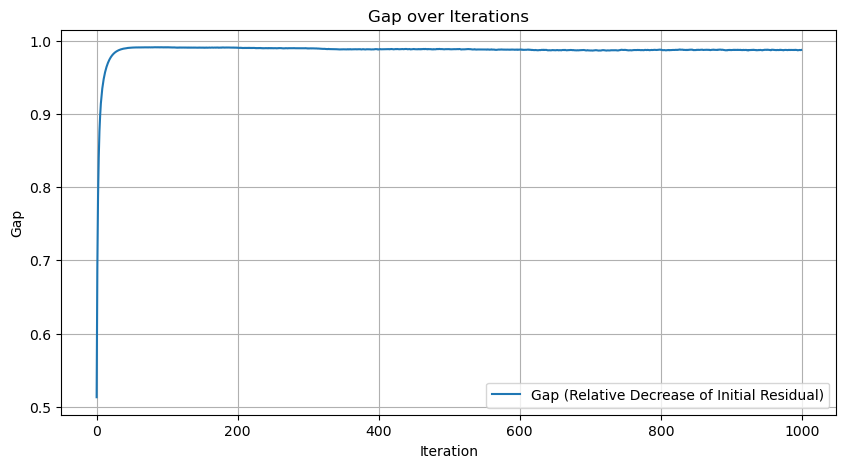

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def primal_gradient_descent(X, y, lambda_, learning_rate=0.01, max_iterations=1000, tol=1e-6):
    n, p = X.shape
    beta = np.zeros(p)  # Initialize coefficients
    loss_history = []
    gap_history = []  # To store the gap values

    # Initial predictions and residual
    initial_predictions = np.dot(X, beta)
    initial_residual = np.linalg.norm(y - initial_predictions)

    for i in range(max_iterations):
        gradient = lasso_gradient(X, y, beta, lambda_)
        beta -= learning_rate * gradient
        
        # Current predictions and residual
        current_predictions = np.dot(X, beta)
        current_residual = np.linalg.norm(y - current_predictions)
        
        # Calculate the relative decrease of the initial residual (Gap)
        if initial_residual > 0:
            gap = (initial_residual - current_residual) / current_residual
            gap_history.append(gap)
        
        # Check convergence
        if gap < tol:
            print(f"Converged at iteration {i}")
            break
        
        loss_history.append(lasso_objective(X, y, beta, lambda_))
    
    return beta, loss_history, gap_history

# Example use of the function with generated data
m, n, rho = 100, 200, 0.1
lambda_ = 0.1
A, b, x_star = generate_sparse_least_squares(m, n, rho)
beta_optimized, loss_history, gap_history = primal_gradient_descent(A, b, lambda_)

# Plotting the gap
plt.figure(figsize=(10, 5))
plt.plot(gap_history, label='Gap (Relative Decrease of Initial Residual)')
plt.xlabel('Iteration')
plt.ylabel('Gap')
plt.title('Gap over Iterations')
plt.legend()
plt.grid(True)
plt.show()
